In [14]:
from imports import *
from PIL import Image
from scipy.ndimage import filters
from scipy.interpolate import LinearNDInterpolator as lint
%matplotlib inline

In [2]:
# get planet data
names, mps, emps, rps, erps = mr.MR_planets()
sort = np.argsort(names)
names, mps, emps, rps, erps = names[sort], mps[sort], emps[sort], rps[sort], erps[sort]

In [3]:
# label exoplanets by a number
SS_names = np.array(['Venus','Earth','Uranus','Neptune'])
nums = np.zeros(names.size)
nums[np.in1d(names, SS_names, invert=True)] = np.arange(1,names.size-3)

In [4]:
# get collisional stripping limit
mpM, rpM = np.loadtxt('input_data/Marcusetal2010_strippingdata.csv', delimiter=',').T

In [5]:
# Get interior models
m1, r1 = mr.MR_MgSiO3H2O_curves(0)
m2, r2 = mr.MR_MgSiO3H2O_curves(.25)
m3, r3 = mr.MR_MgSiO3H2O_curves(.5)
m4, r4 = mr.MR_MgSiO3H2O_curves(.75)
m5, r5 = mr.MR_MgSiO3H2O_curves(1)
m6, r6 = mr.MR_FeMgSiO3_curves(.5)
m7, r7 = mr.MR_FeMgSiO3_curves(1)
Mmodels, Rmodels = np.array([m1,m2,m3,m4,m5,m6,m7]).reshape(7,m1.size), \
np.array([r1,r2,r3,r4,r5,r6,r7]).reshape(7,r1.size)
model_labels = ['100% H$_2$O','25% MgSiO$_3$ - 75% H$_2$O', '50% MgSiO$_3$ - 50% H$_2$O','75% MgSiO$_3$ - 25% H$_2$O',\
                '100% MgSiO$_3$','50% Fe - 50% MgSiO$_3$','100% Fe']

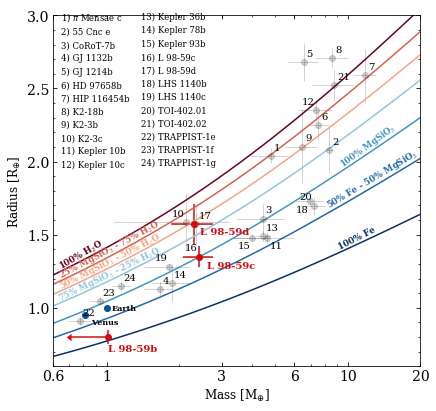

In [49]:
# plotting
fig = plt.figure(figsize=(6,5.6))
ax = fig.add_subplot(111)

# plot interior curve
cols = ['#67001f','#d6604d','#f4a582','#92c5de','#4393c3','#2166ac','#053061']
#xs, dy, rot = np.array([2.6,2.6,2.6,2.6,9,7.6,9]), \
#              np.array([1.2e-2,1.3e-2,7e-3,5e-3,3e-2,2e-2,2e-2]), \
#              np.array([41,38,36,34,36,32,27])
xs, dy, rot = np.array([.62,.62,.62,.62,9,8,9]), \
              np.array([1.2e-2,1.3e-2,7e-3,5e-3,3e-2,2e-2,2e-2]), \
              np.array([30,28,27,26,36,31,27])
for i in range(7):
    ax.plot(Mmodels[i], Rmodels[i], '-', c=cols[i])
    ax.text(xs[i], Rmodels[i][abs(Mmodels[i]-xs[i])==abs(Mmodels[i]-xs[i]).min()]+dy[i],
            model_labels[i], color=cols[i], fontsize=8.5, rotation=rot[i],
            verticalalignment='bottom', weight='bold')
    
# plot collisional stripping curve
#ax.plot(mpM, rpM, 'k-')
    
# plot SS planets
SSplanets = np.where(np.in1d(names, SS_names[:2]))[0]
for i in SSplanets:
    ax.errorbar(mps[i], rps[i], xerr=emps[i], yerr=erps[i], fmt='o',
                capsize=0, elinewidth=1, c='#08519c')
    dy = -.06 if names[i] == 'Venus' else -.02
    ax.text(mps[i]+.05, rps[i]+dy, names[i], horizontalalignment='left', fontsize=8, weight='bold')

# plt exoplanets
exoplanets = np.where(np.in1d(names, SS_names, invert=1))[0]
xinvert = [20,15,18,16,12,19,10]
yinvert = [18,15,11]
for i in range(exoplanets.size):
    ax.errorbar(mps[exoplanets][i], rps[exoplanets][i], xerr=emps[exoplanets][i], 
                yerr=erps[exoplanets][i], fmt='o', capsize=0, elinewidth=1, c='#252525', alpha=.2)
    dx = -.06 if i+1 in xinvert else .01
    dy = -.075 if i+1 in yinvert else .04
    ax.text(10**(np.log10(mps[exoplanets][i])+dx), rps[exoplanets][i]+dy, i+1)
    ax.plot([0], [0], 'o', ms=0, label='%i) %s'%(i+1, names[exoplanets][i]))
    
# plot TOI-175 planets
col = '#d20c0c'
ax.errorbar([2.42,2.31], [1.35,1.57], xerr=[.35,.46], yerr=[.07,.14], fmt='o', color=col, capsize=0)
ax.errorbar([1.01], [.8], xerr=([.3],[0]), yerr=[.05], fmt='o', color=col, xuplims=True, capsize=0)
ax.text(2.6, 1.27, 'L 98-59c', weight='semibold', fontsize=10, color=col)
ax.text(2.43, 1.5, 'L 98-59d', weight='semibold', fontsize=10, color=col)
ax.text(1.01, .7, 'L 98-59b', weight='semibold', fontsize=10, color=col)
    
ax.set_xscale('log')
ax.set_xlim((.6,20)), ax.set_ylim((.6,3))
ax.set_xlabel('Mass [M$_{\oplus}$]', fontsize=12), ax.set_ylabel('Radius [R$_{\oplus}$]', fontsize=12)
ax.set_xticks([.6,1,3,6,10,20]), ax.set_xticklabels([.6,1,3,6,10,20])

plt.minorticks_on()
plt.legend(bbox_to_anchor=[.464,.54], ncol=2, columnspacing=-1.5, frameon=False, fontsize=8.5)
plt.subplots_adjust(bottom=.09, left=.11, right=.96, top=.96)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/MRplot.png')

In [47]:
names

array(['$\\pi$ Mensae c', '55 Cnc e', 'CoRoT-7b', 'Earth', 'GJ 1132b',
       'GJ 1214b', 'HD 97658b', 'HIP 116454b', 'K2-18b', 'K2-3b', 'K2-3c',
       'Kepler 10b', 'Kepler 10c', 'Kepler 36b', 'Kepler 78b',
       'Kepler 93b', 'L 98-59c', 'L 98-59d', 'LHS 1140b', 'LHS 1140c',
       'Neptune', 'TOI-402.01', 'TOI-402.02', 'TRAPPIST-1e',
       'TRAPPIST-1f', 'TRAPPIST-1g', 'Uranus', 'Venus'], dtype='|S14')

## plot planets in radius valley space

In [7]:
# get radius valley data from Fulton+Petigura 2018
imgPE = Image.open('plots/FP18_occurrence.png')
pixmapPE = imgPE.load()  # RGB values
print imgPE.size

(1180, 922)


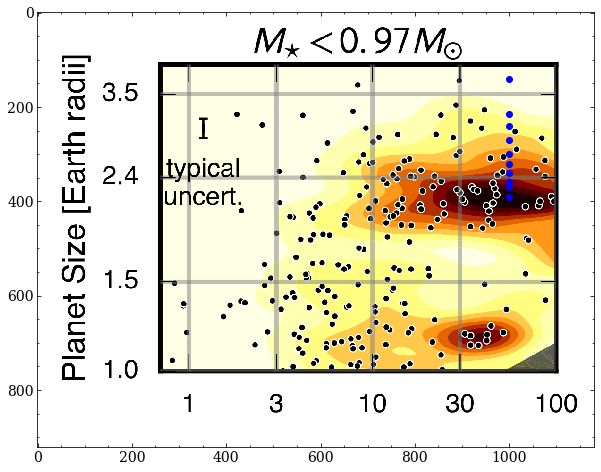

In [8]:
# define RGB values on the occurrence rate colorbar
ysPE = np.array([140,215,240,270,300,320,340,360,370,390])
xsPE = np.repeat(1000,ysPE.size)
farrPE = np.arange(11)*.1+.1
plt.figure(figsize=(12,8))
plt.imshow(imgPE)
plt.plot(xsPE, ysPE, 'bo')

# print RGB values
fdictPE = {}
for i in range(xsPE.size):
    fdictPE[pixmapPE[xsPE[i],ysPE[i]]] = np.round(farrPE[i]-.1,2)

In [9]:
# construct the fmap from the RGB values
fmap_photoevap = np.zeros(imgPE.size)+np.nan
for i in range(imgPE.size[0]):
    for j in range(imgPE.size[1]):
        if pixmapPE[i,j] in fdictPE.keys():
            fmap_photoevap[i,j] = fdictPE[pixmapPE[i,j]]
            
# trim the edges
fmap_photoevap_trimmed = np.flip(fmap_photoevap[320:1100,110:760],1)

(None, None)

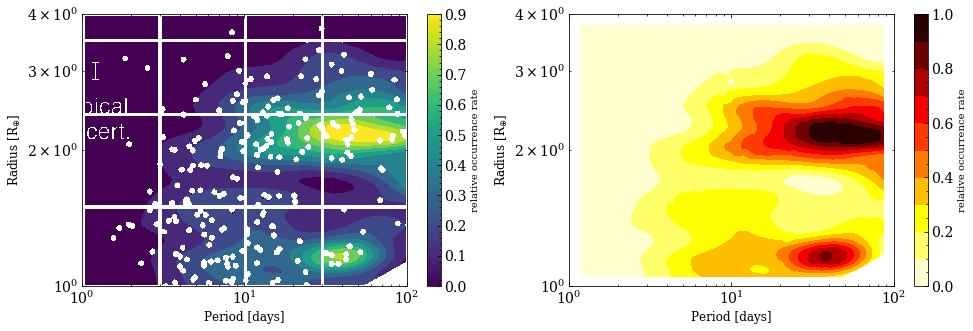

In [34]:
# resample P and rp according to f
xsize, ysize = fmap_photoevap_trimmed.shape
ParrPE, rparrPE = np.logspace(0,2,xsize), np.logspace(0,np.log10(4),ysize)
gx, gy = np.where(np.isfinite(fmap_photoevap_trimmed))
PsampPE, rpsampPE, fsampPE = ParrPE[gx], rparrPE[gy], fmap_photoevap_trimmed[gx,gy]
fsampPE /= np.nanmax(fsampPE)

# plotting
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.pcolormesh(ParrPE, rparrPE, fmap_photoevap_trimmed.T)
plt.colorbar(label='relative occurrence rate')
plt.xlabel('Period [days]', fontsize=12), plt.ylabel('Radius [R$_{\oplus}$]', fontsize=12)
plt.xscale('log'), plt.yscale('log')

# interpolate over P and rp
#lint_f = lint(np.array([PsampPE,rpsampPE]).T, fsampPE)
ParrPEv2, rparrPEv2 = np.meshgrid(ParrPE, rparrPE)
farrPEv2 = filters.gaussian_filter(lint_f(ParrPEv2, rparrPEv2), 5)

plt.subplot(122)
#plt.pcolormesh(ParrPEv2, rparrPEv2, farrPEv2, cmap=plt.get_cmap('hot_r'))
plt.contourf(ParrPEv2, rparrPEv2, farrPEv2, 10, cmap=plt.get_cmap('hot_r'))
plt.colorbar(label='relative occurrence rate')
plt.xlabel('Period [days]', fontsize=12), plt.ylabel('Radius [R$_{\oplus}$]', fontsize=12)
plt.xscale('log'), plt.yscale('log')

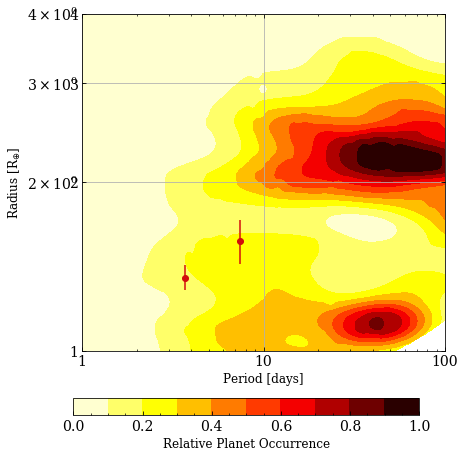

In [86]:
## make final plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# trim nan edges and rescale axes
farrPEv3 = farrPEv2.T[27:754,23:622]
ParrPEv3 = np.logspace(0,2,farrPEv3.shape[0])
rparrPEv3 = np.logspace(0,np.log10(4),farrPEv3.shape[1])

# plot occurrence from FP18 for Ms<.97 MSun
im = ax.contourf(ParrPEv3, rparrPEv3, farrPEv3.T, 10, cmap=plt.get_cmap('hot_r'))
cbar = fig.add_axes((.1,.05,.8,.04))
cbar = plt.colorbar(im, cax=cbar, orientation='horizontal')
cbar.set_label('Relative Planet Occurrence', fontsize=12)
ax.set_xlabel('Period [days]', fontsize=12), ax.set_ylabel('Radius [R$_{\oplus}$]', fontsize=12)
ax.set_xscale('log'), ax.set_yscale('log')
ax.set_yticks(np.arange(1,5)), ax.set_yticklabels(np.arange(1,5))
ax.set_xticks(np.logspace(0,2,3)), ax.set_xticklabels(np.logspace(0,2,3,dtype=int))
ax.set_xlim((1,100)), ax.set_ylim((1,4))
ax.grid()

# plot TOI175 planets
ax.errorbar([2.25,3.69,7.45], [.8,1.35,1.57], yerr=[.05,.07,.14], fmt='o', color=col, capsize=0)
#ax.text(2.6, 1.27, 'L 98-59c', weight='semibold', fontsize=10, color=col)
#ax.text(2.43, 1.5, 'L 98-59d', weight='semibold', fontsize=10, color=col)
#ax.text(1.01, .7, 'L 98-59b', weight='semibold', fontsize=10, color=col)

plt.subplots_adjust(bottom=.2, top=.98, right=.96, left=.12)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/Prpplot.png')